# Fashion-MNIST Dataset Exploratory Data Analysis (EDA)

This notebook performs an initial exploratory data analysis on the **Fashion-MNIST** dataset, which is a drop-in replacement for the original MNIST dataset. It consists of 70,000 grayscale images (28x28 pixels) of 10 categories of clothing articles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
import warnings
warnings.filterwarnings('ignore')

2025-10-03 04:26:25.411696: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-03 04:26:25.412119: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-03 04:26:25.499081: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-03 04:26:27.692476: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

## 1. Load Data and Initial Exploration

In [2]:
# Load data
def load_fashion_mnist():
    # Load train and test data and combine them for full EDA
    (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
    X = np.vstack([X_train_full, X_test])
    y = np.hstack([y_train_full, y_test])
    return X, y

X, y = load_fashion_mnist()

print("=== FASHION-MNIST DATASET EXPLORATORY ANALYSIS ===")
print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Image dimensions: {X[0].shape}")
print(f"Number of classes: {len(np.unique(y))}")

# Class names mapping
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("\n=== CLASS NAMES ===")
for i, name in enumerate(class_names):
    print(f"Class {i}: {name}")

=== FASHION-MNIST DATASET EXPLORATORY ANALYSIS ===
Dataset shape: (70000, 28, 28)
Target shape: (70000,)
Image dimensions: (28, 28)
Number of classes: 10

=== CLASS NAMES ===
Class 0: T-shirt/top
Class 1: Trouser
Class 2: Pullover
Class 3: Dress
Class 4: Coat
Class 5: Sandal
Class 6: Shirt
Class 7: Sneaker
Class 8: Bag
Class 9: Ankle boot


## 2. Basic Statistics and Missing Values

In [3]:
# Basic statistics
print("\n=== BASIC STATISTICS ===")
# Flatten the images to compute statistics on pixel features
X_flat = X.reshape(X.shape[0], -1)
df = pd.DataFrame(X_flat)
print(f"Pixel value range: [{X.min()}, {X.max()}]")
print(df.describe())

# Check for missing values
print("\n=== MISSING VALUES ===")
print(f"Missing values in features: {np.isnan(X).sum()}")
print(f"Missing values in target: {np.isnan(y).sum()}")


=== BASIC STATISTICS ===
Pixel value range: [0, 255]
                0             1             2             3             4    \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.000771      0.006414      0.034486      0.098886      0.247843   
std        0.087339      0.296605      1.200882      2.458872      4.408110   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     45.000000    218.000000    185.000000    227.000000   

                5             6             7             8            9    \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.00000   
mean       0.408714      0.802900      2.204386      5.634900     14.41000   


## 3. Target Distribution (Class Balance)


=== TARGET DISTRIBUTION ===


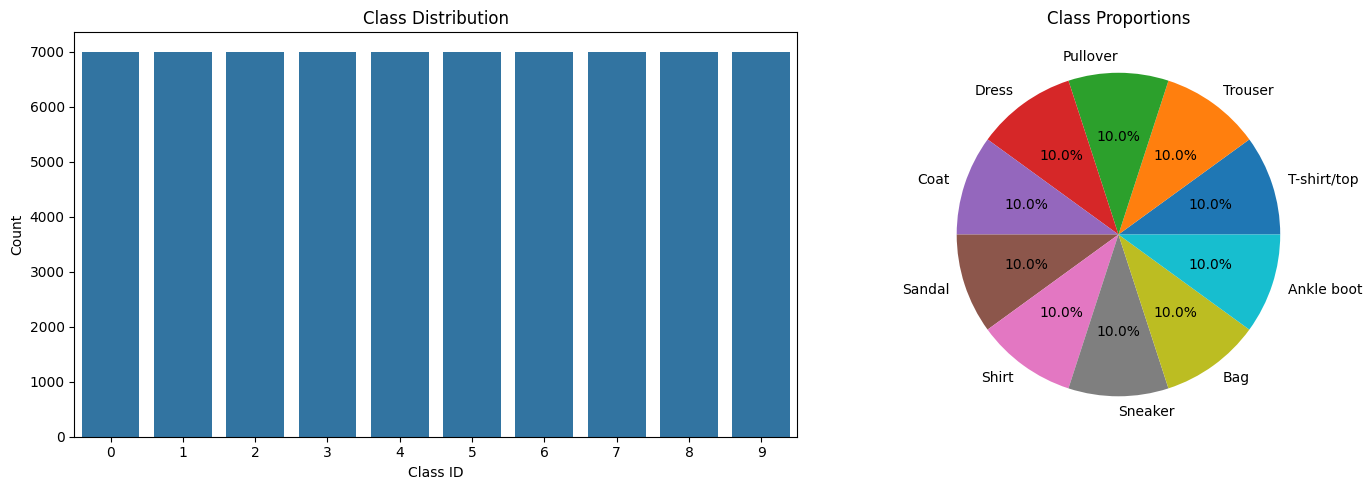

In [4]:
# Target distribution
print("\n=== TARGET DISTRIBUTION ===")
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=range(10))

plt.subplot(1, 2, 2)
class_counts = pd.Series(y).value_counts().sort_index()
plt.pie(class_counts, labels=[class_names[i] for i in class_counts.index], 
        autopct='%1.1f%%')
plt.title('Class Proportions')

plt.tight_layout()
plt.show()

## 4. Sample Image Visualization


=== SAMPLE IMAGES ===


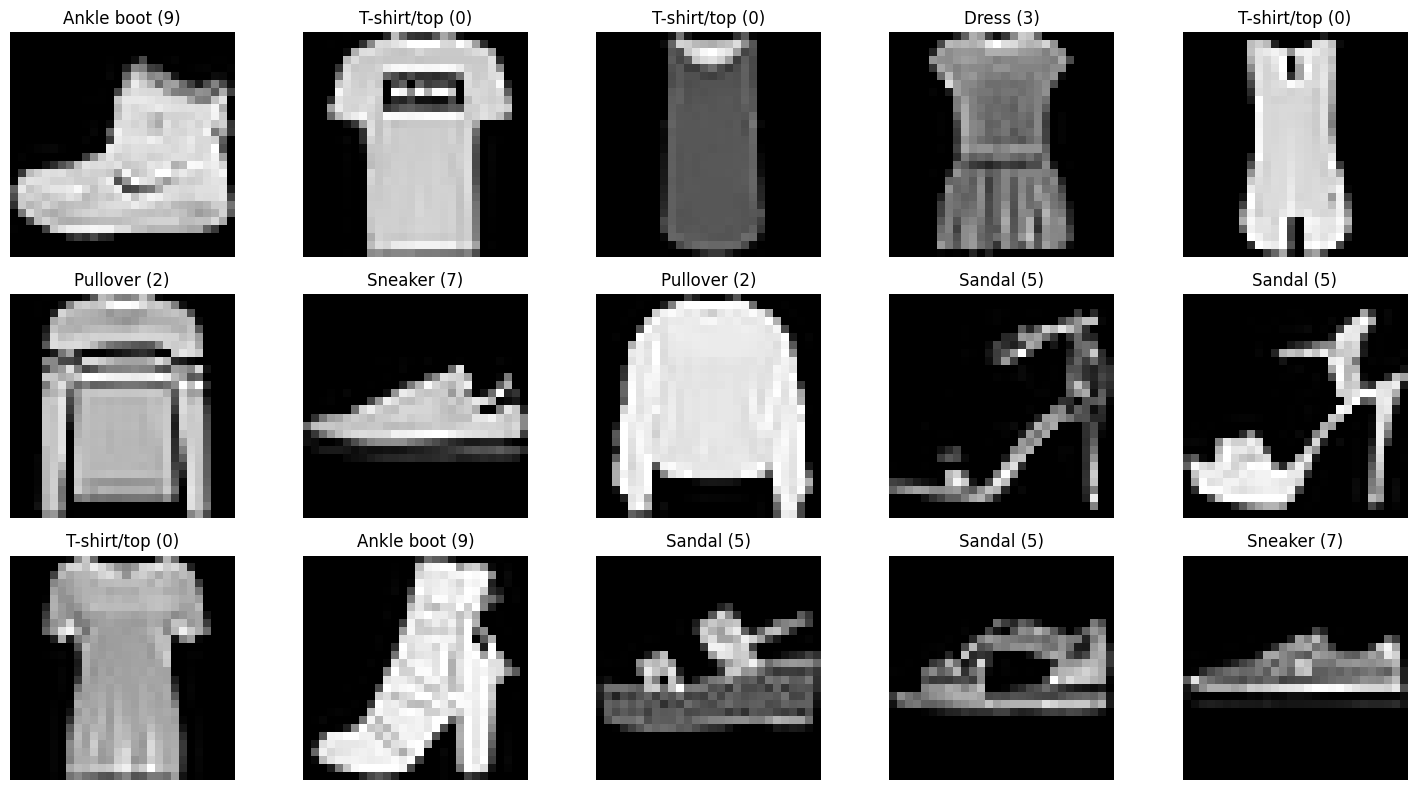

In [5]:
# Sample images
print("\n=== SAMPLE IMAGES ===")
plt.figure(figsize=(15, 8))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f'{class_names[y[i]]} ({y[i]})')
    plt.axis('off')
plt.tight_layout()
plt.show()

## 5. Pixel Intensity Analysis


=== PIXEL INTENSITY DISTRIBUTION ===


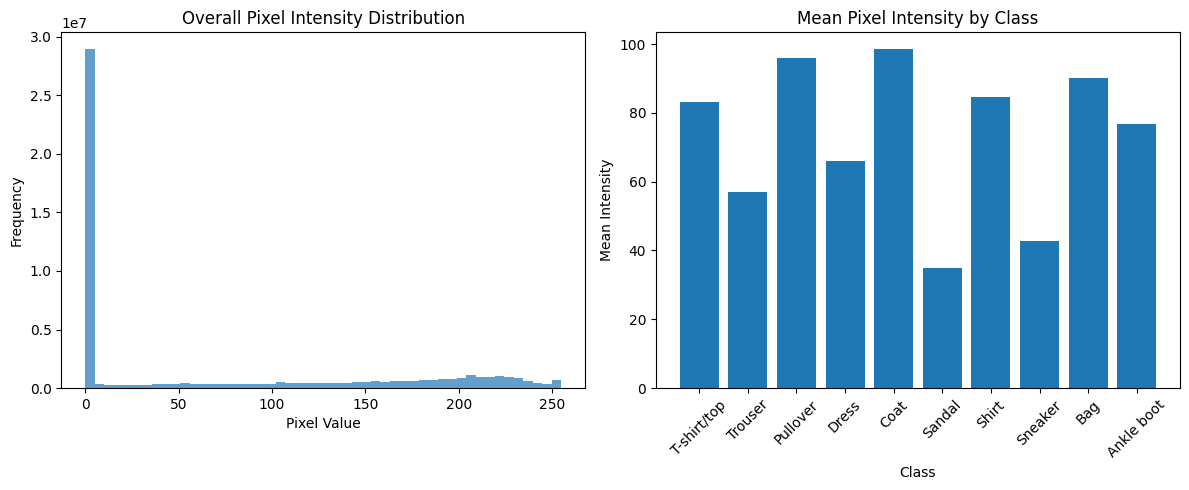

In [6]:
# Pixel intensity distribution
print("\n=== PIXEL INTENSITY DISTRIBUTION ===")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(X_flat.flatten(), bins=50, alpha=0.7)
plt.title('Overall Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Mean intensity per class
mean_intensities = [X_flat[y == i].mean() for i in range(10)]
plt.bar(range(10), mean_intensities)
plt.title('Mean Pixel Intensity by Class')
plt.xlabel('Class')
plt.ylabel('Mean Intensity')
plt.xticks(range(10), [class_names[i] for i in range(10)], rotation=45)

plt.tight_layout()
plt.show()

## 6. Class-wise Samples Visualization


=== CLASS-WISE SAMPLE IMAGES ===


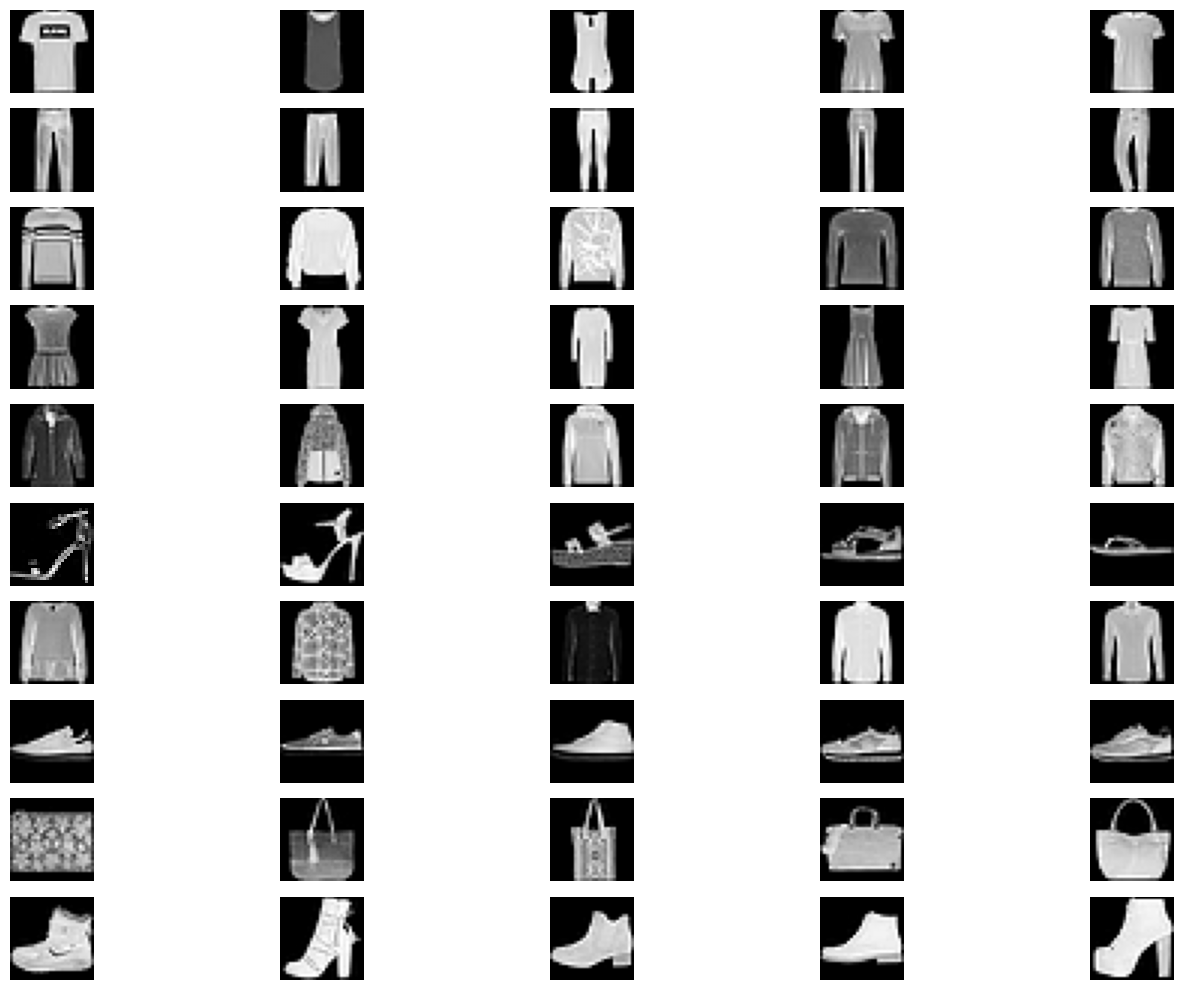

In [7]:
# Class-wise samples
print("\n=== CLASS-WISE SAMPLE IMAGES ===")
plt.figure(figsize=(15, 10))
for class_id in range(10):
    # Get up to 5 samples for the current class
    class_samples = X[y == class_id][:5]
    for i, sample in enumerate(class_samples):
        # The subplot calculation ensures 5 images per row, 10 rows total
        plt.subplot(10, 5, class_id * 5 + i + 1)
        plt.imshow(sample, cmap='gray')
        if i == 0:
            # Label the first image in the row with the class name
            plt.ylabel(class_names[class_id], rotation=0, ha='right')
        plt.axis('off')
plt.tight_layout()
plt.show()